In [110]:
import pandas as pd
import re

data_fname = r"D:\kondenzace_jader\data\Chromatin Architecture Analyses Python\Mikroskop horní\zz_Original data files  reduced_results/results.xlsx"

df = pd.read_excel(data_fname)
df


# file_name example D:\kondenzace_jader\data\Chromatin Architecture Analyses Python\Mikroskop horní\zz_Original data files_results\Cell type 1 (FaDu) Irradiated - different times after irradiation\30min PI_IR 6Gy\rawdata\0001\01_cell_10_features.json
# crate new colum that will identify groups based on file_names - cell type number and iradiated vs non-irradianted

def extract_groups(path):
    pattern = re.compile(r'Cell type (\d+).*?(Irradiated|Non-irradiated)', re.IGNORECASE)
    match = pattern.search(path)
    if match:
        cell_type = f"Cell type {match.group(1)}"
        condition = match.group(2).capitalize()  # Irradiated / Non-irradiated
        return cell_type, condition
    return None, None

df[["cell_type", "condition"]] = df["file_name"].apply(
    lambda x: pd.Series(extract_groups(str(x)))
)

df["group"] = df["cell_type"] + " - " + df["condition"]


# show unique groups
df["group"].unique()


feature_names = df.columns.tolist()[:-4]
# print(feature_names)

# to_remove = [
#     'fractal_dim',
#     'fourier_hff',
#     'tpd',
#     'radial_in_out_fraction',
#     'radial_max_position',
#     'localstd_3',
#     'localstd_5',
#     'localstd_11',
#     'localstd_15',
#     # 'localstd_21',
#     'localstd_max',
#     'localstd_argmax',
#     # 'log_map_min_mean',
#     'log_map_max_mean',
#     # 'log_map_argmin_mean',
#     'log_map_argmax_mean',
#     'entropy',
#     # 'spectral_entropy',
#  ]

# for feature in to_remove:
    
#     df = df.drop(columns=[feature])

# feature_names


# to_keep = [
#     # 'fractal_dim',
#     'fourier_hff',
#     # 'tpd',
#     # 'radial_in_out_fraction',
#     # 'radial_max_position',
#     # 'localstd_3',
#     # 'localstd_5',
#     'localstd_11',
#     # 'localstd_15',
#     # 'localstd_21',
#     # 'localstd_max',
#     # 'localstd_argmax',
#     # 'log_map_min_mean',
#     # 'log_map_max_mean',
#     # 'log_map_argmin_mean',
#     # 'log_map_argmax_mean',
#     # 'entropy',
#     'spectral_entropy',
#  ]

# for feature in feature_names:
#     if feature not in to_keep:
#         df = df.drop(columns=[feature])

to_keep =[
    # 'fractal_dim',
    # 'fourier_hff',
    # 'tpd',
    # 'radial_in_out_fraction',
    'radial_max_position',
    # 'localstd_3',
    # 'localstd_5',
    'localstd_11',
    # 'localstd_15',
    # 'localstd_21',
    # 'localstd_max',
    # 'localstd_argmax',
    # 'log_map_0_mean',
    # 'log_map_0_mean_abs',
    # 'log_map_0_mean_pos',
    # 'log_map_0_mean_neg',
    # 'log_map_1_mean',
    # 'log_map_1_mean_abs',
    # 'log_map_1_mean_pos',
    # 'log_map_1_mean_neg',
    # 'log_map_2_mean',
    # 'log_map_2_mean_abs',
    # 'log_map_2_mean_pos',
    # 'log_map_2_mean_neg',
    # 'log_map_3_mean',
    # 'log_map_3_mean_abs',
    # 'log_map_3_mean_pos',
    # 'log_map_3_mean_neg',
    # 'log_map_4_mean',
    # 'log_map_4_mean_abs',
    # 'log_map_4_mean_pos',
    # 'log_map_4_mean_neg',
    # 'log_map_min_mean',
    # 'log_map_max_mean',
    # 'log_map_max_mean_pos',
    # 'log_map_min_mean_neg',
    # 'log_map_min_mean_abs',
    # 'log_map_max_mean_abs',
    # 'log_map_argmin_mean',
    # 'log_map_argmax_mean',
    # 'log_map_argmin_mean_neg',
    # 'log_map_argmax_mean_pos',
    # 'log_map_argmax_mean_abs',
    'focus_laplacian',
    # 'entropy',
    'spectral_entropy',
 ]

for feature in feature_names:
    if feature not in to_keep:
        df = df.drop(columns=[feature])

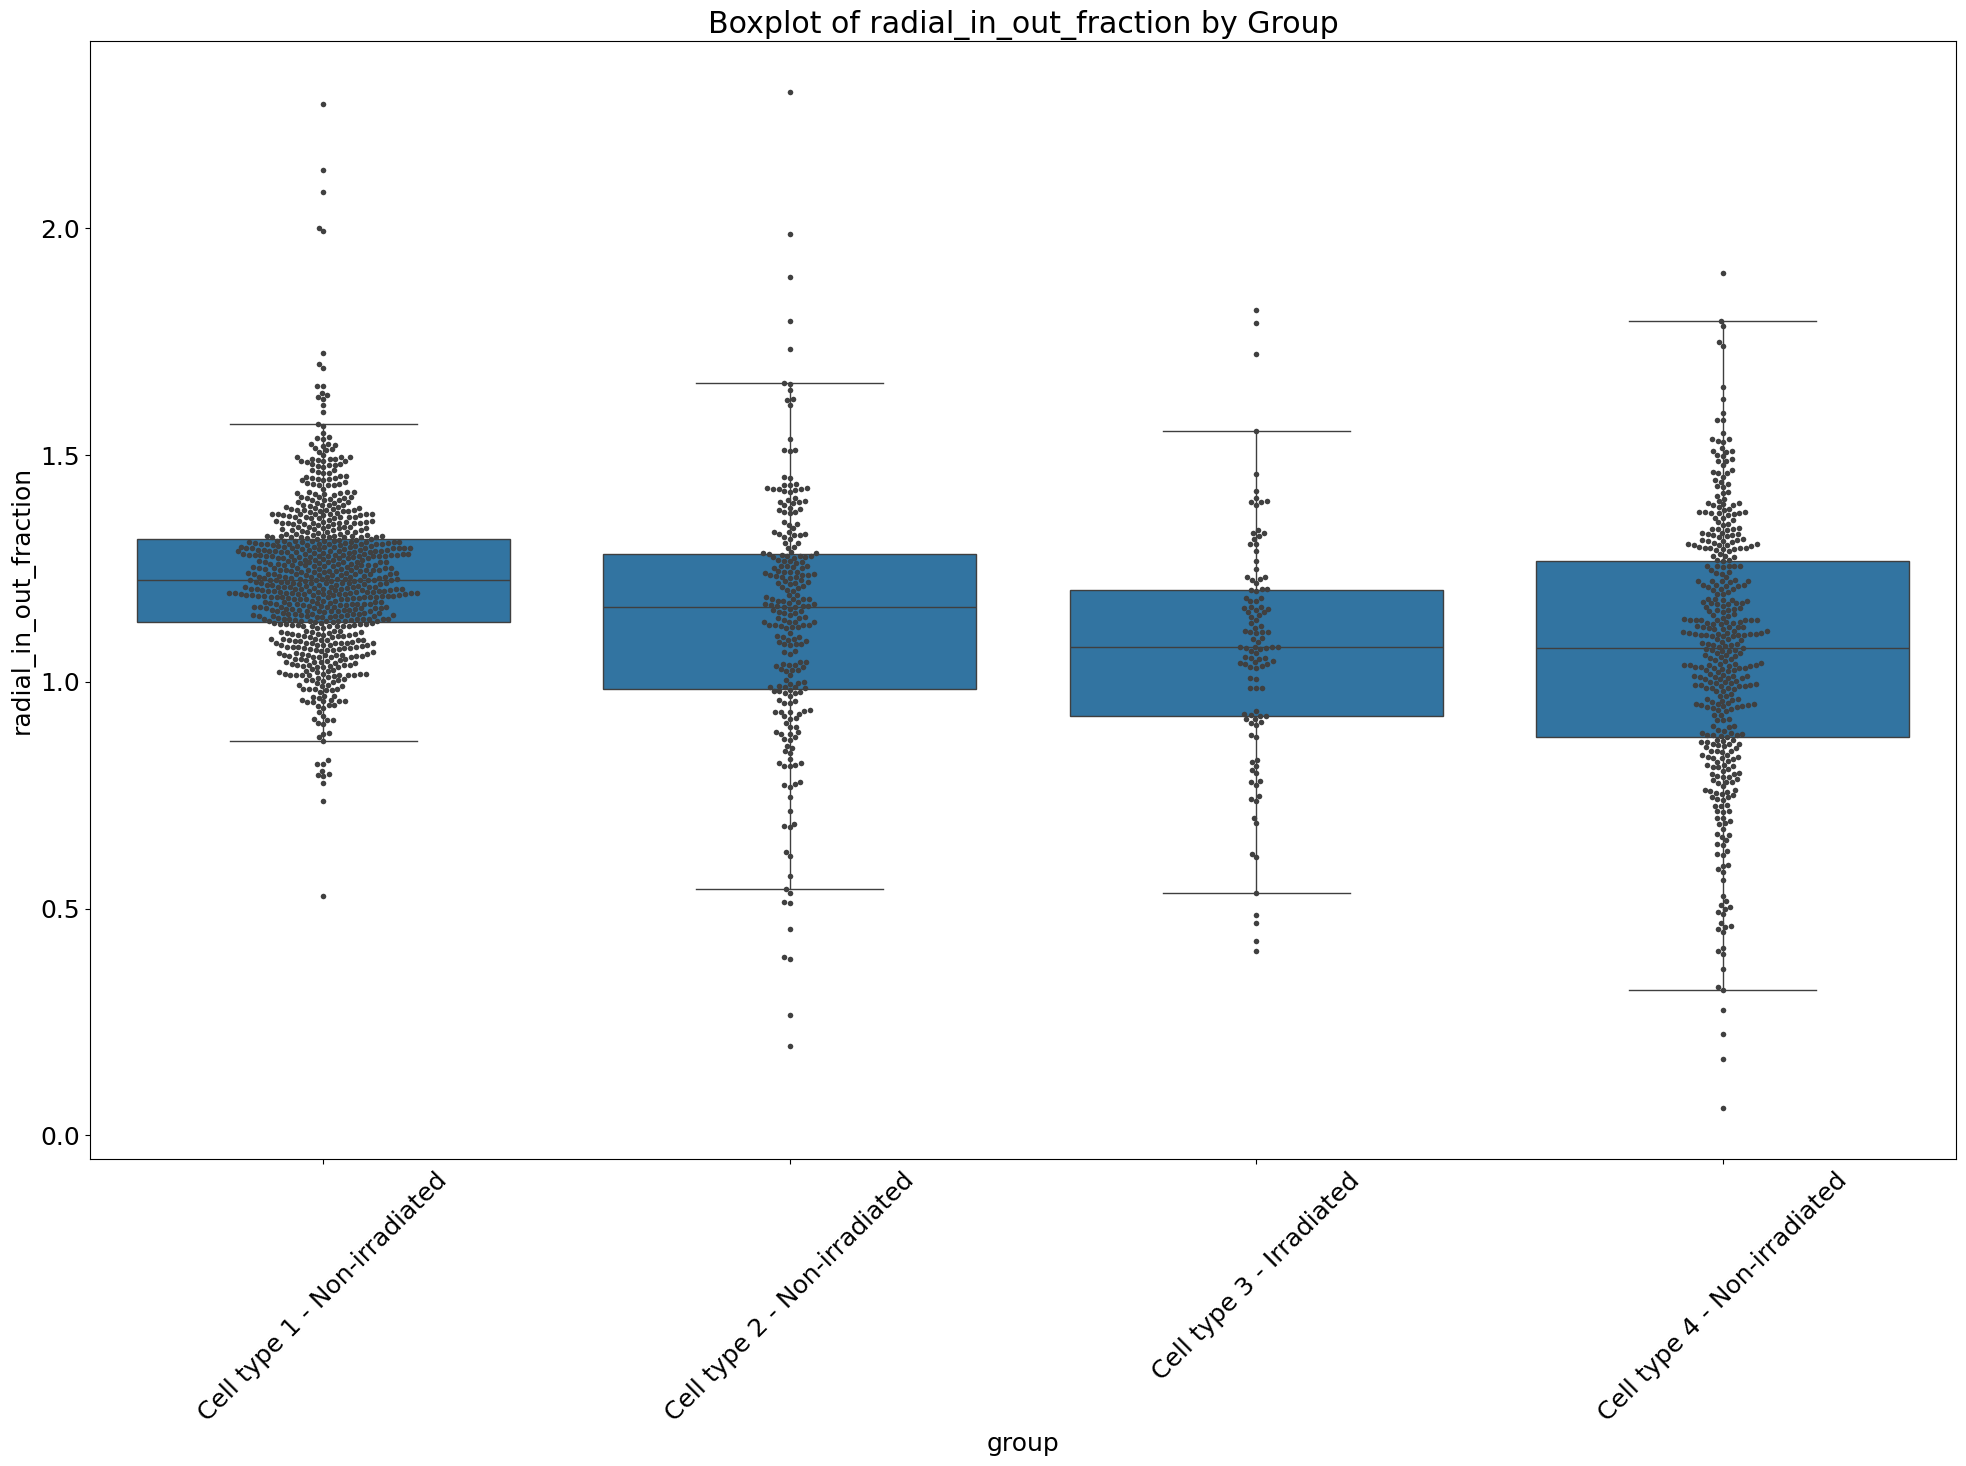

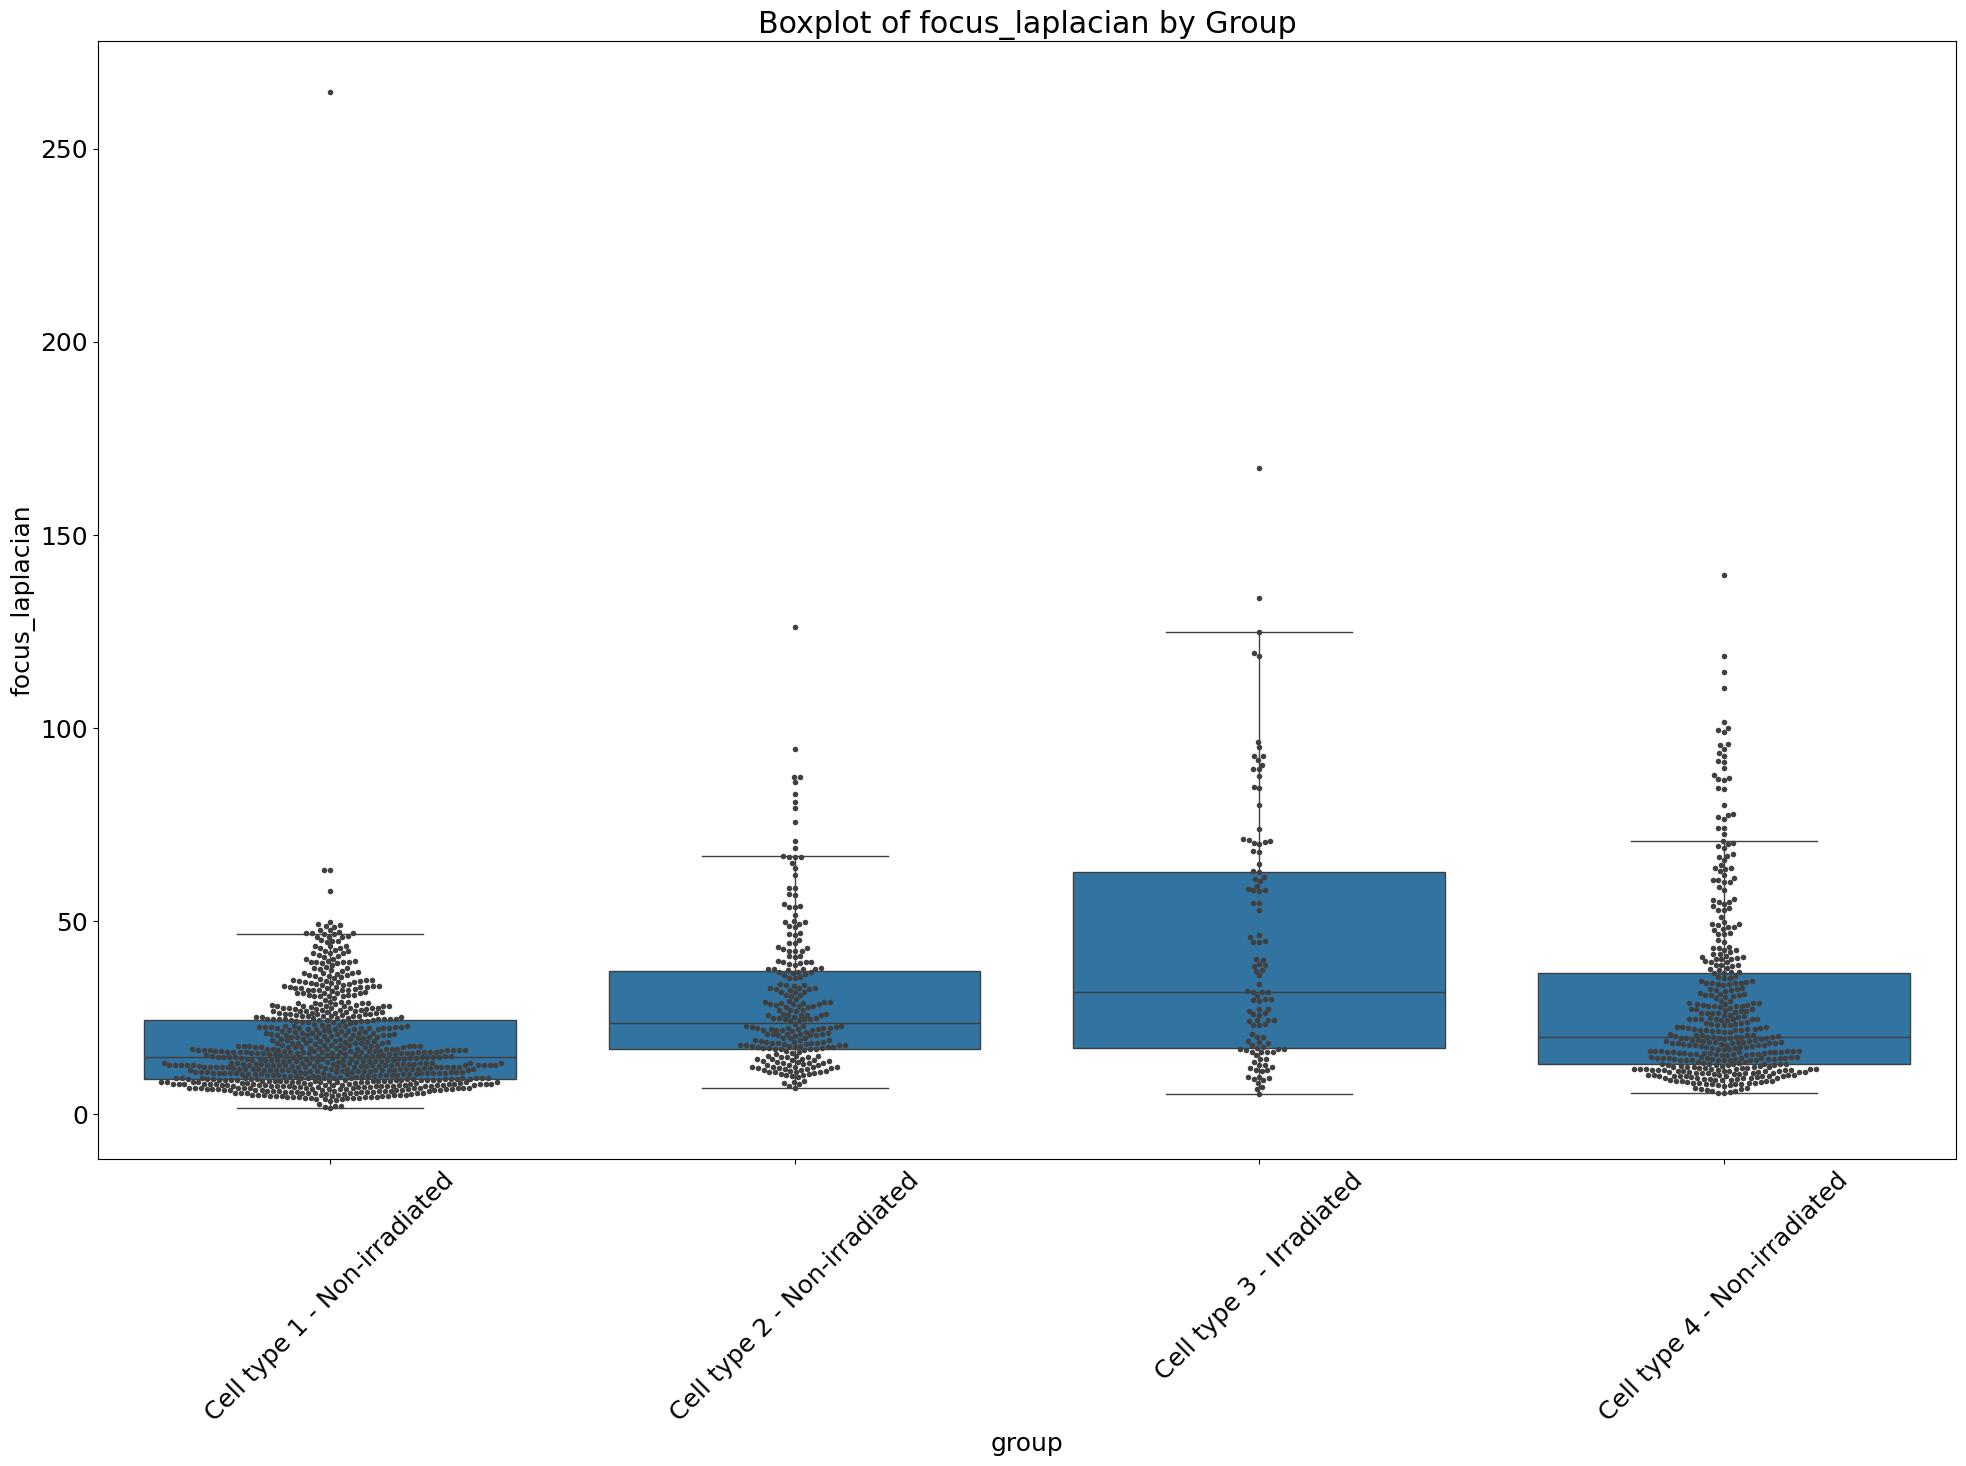

In [88]:
# boxplot of all features
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = df.columns.tolist()[:-4]

for feature in feature_names:
    plt.figure(figsize=(20, 15))
    sns.boxplot(data=df, x="group", y=feature, showfliers=False)
    # small points
    sns.swarmplot(data=df, x="group", y=feature, color=".25", size=4)
    plt.title(f"Boxplot of {feature} by Group")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [109]:
feature

'spectral_entropy'

[25-08-2025 13:40:22] [pca.pca] [INFO] Extracting column labels from dataframe.
[25-08-2025 13:40:22] [pca.pca] [INFO] Normalizing input data per feature (zero mean and unit variance)..
[25-08-2025 13:40:22] [pca.pca] [INFO] PCA reduction performed to capture 95.0% explained variance using 4 columns of the input data.
[25-08-2025 13:40:22] [pca.pca] [INFO] Fit using PCA.
[25-08-2025 13:40:22] [pca.pca] [INFO] Compute loadings and PCs.
[25-08-2025 13:40:22] [pca.pca] [INFO] Compute explained variance.
[25-08-2025 13:40:22] [pca.pca] [INFO] Number of components is 4 that covers 95.00% explained variance.
[25-08-2025 13:40:22] [pca.pca] [INFO] The PCA reduction is performed on the 4 columns of the input dataframe.
[25-08-2025 13:40:22] [pca.pca] [INFO] Fit using PCA.
[25-08-2025 13:40:22] [pca.pca] [INFO] Compute loadings and PCs.
[25-08-2025 13:40:22] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[25-08-2025 13:40:22] [pca.pca] [INFO] M

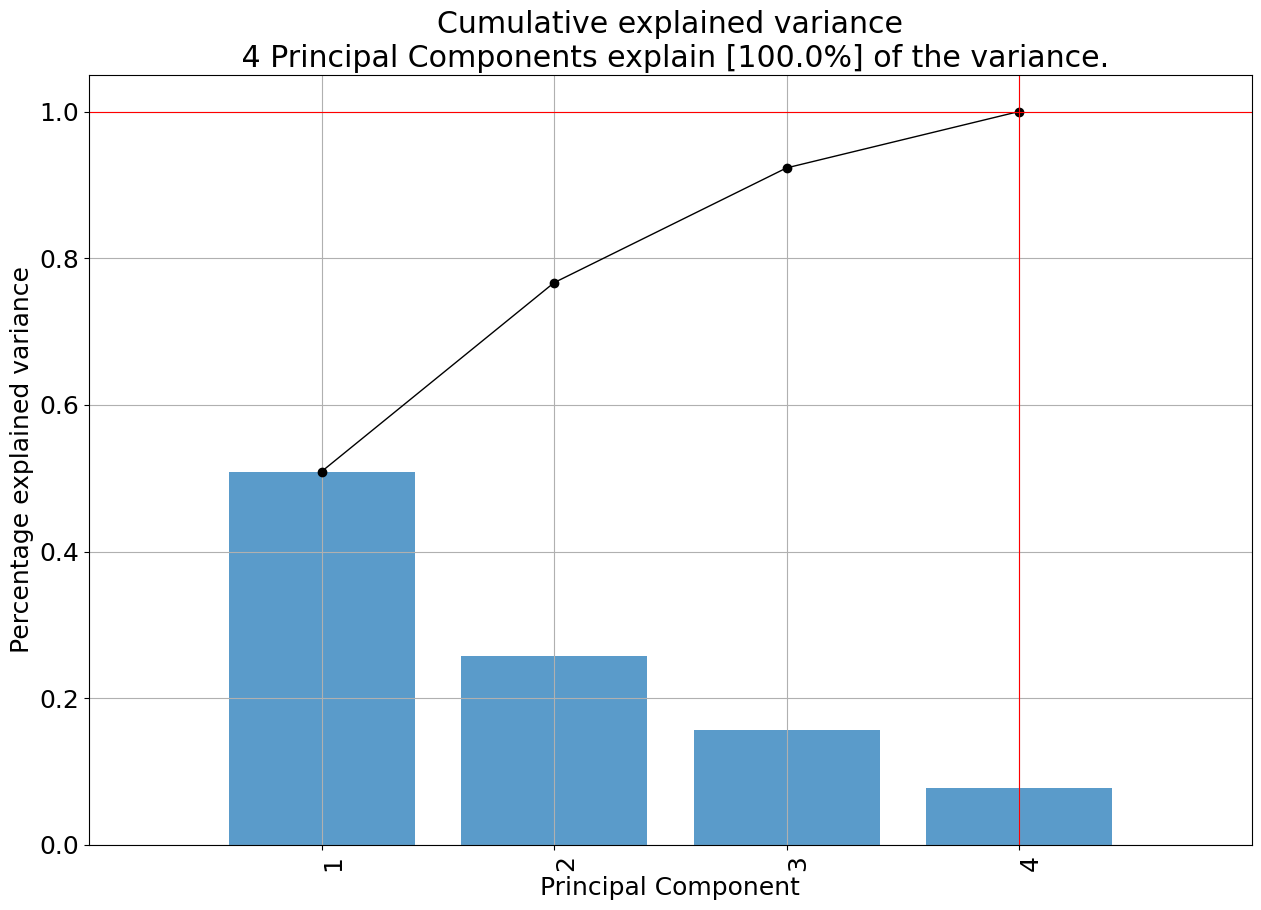

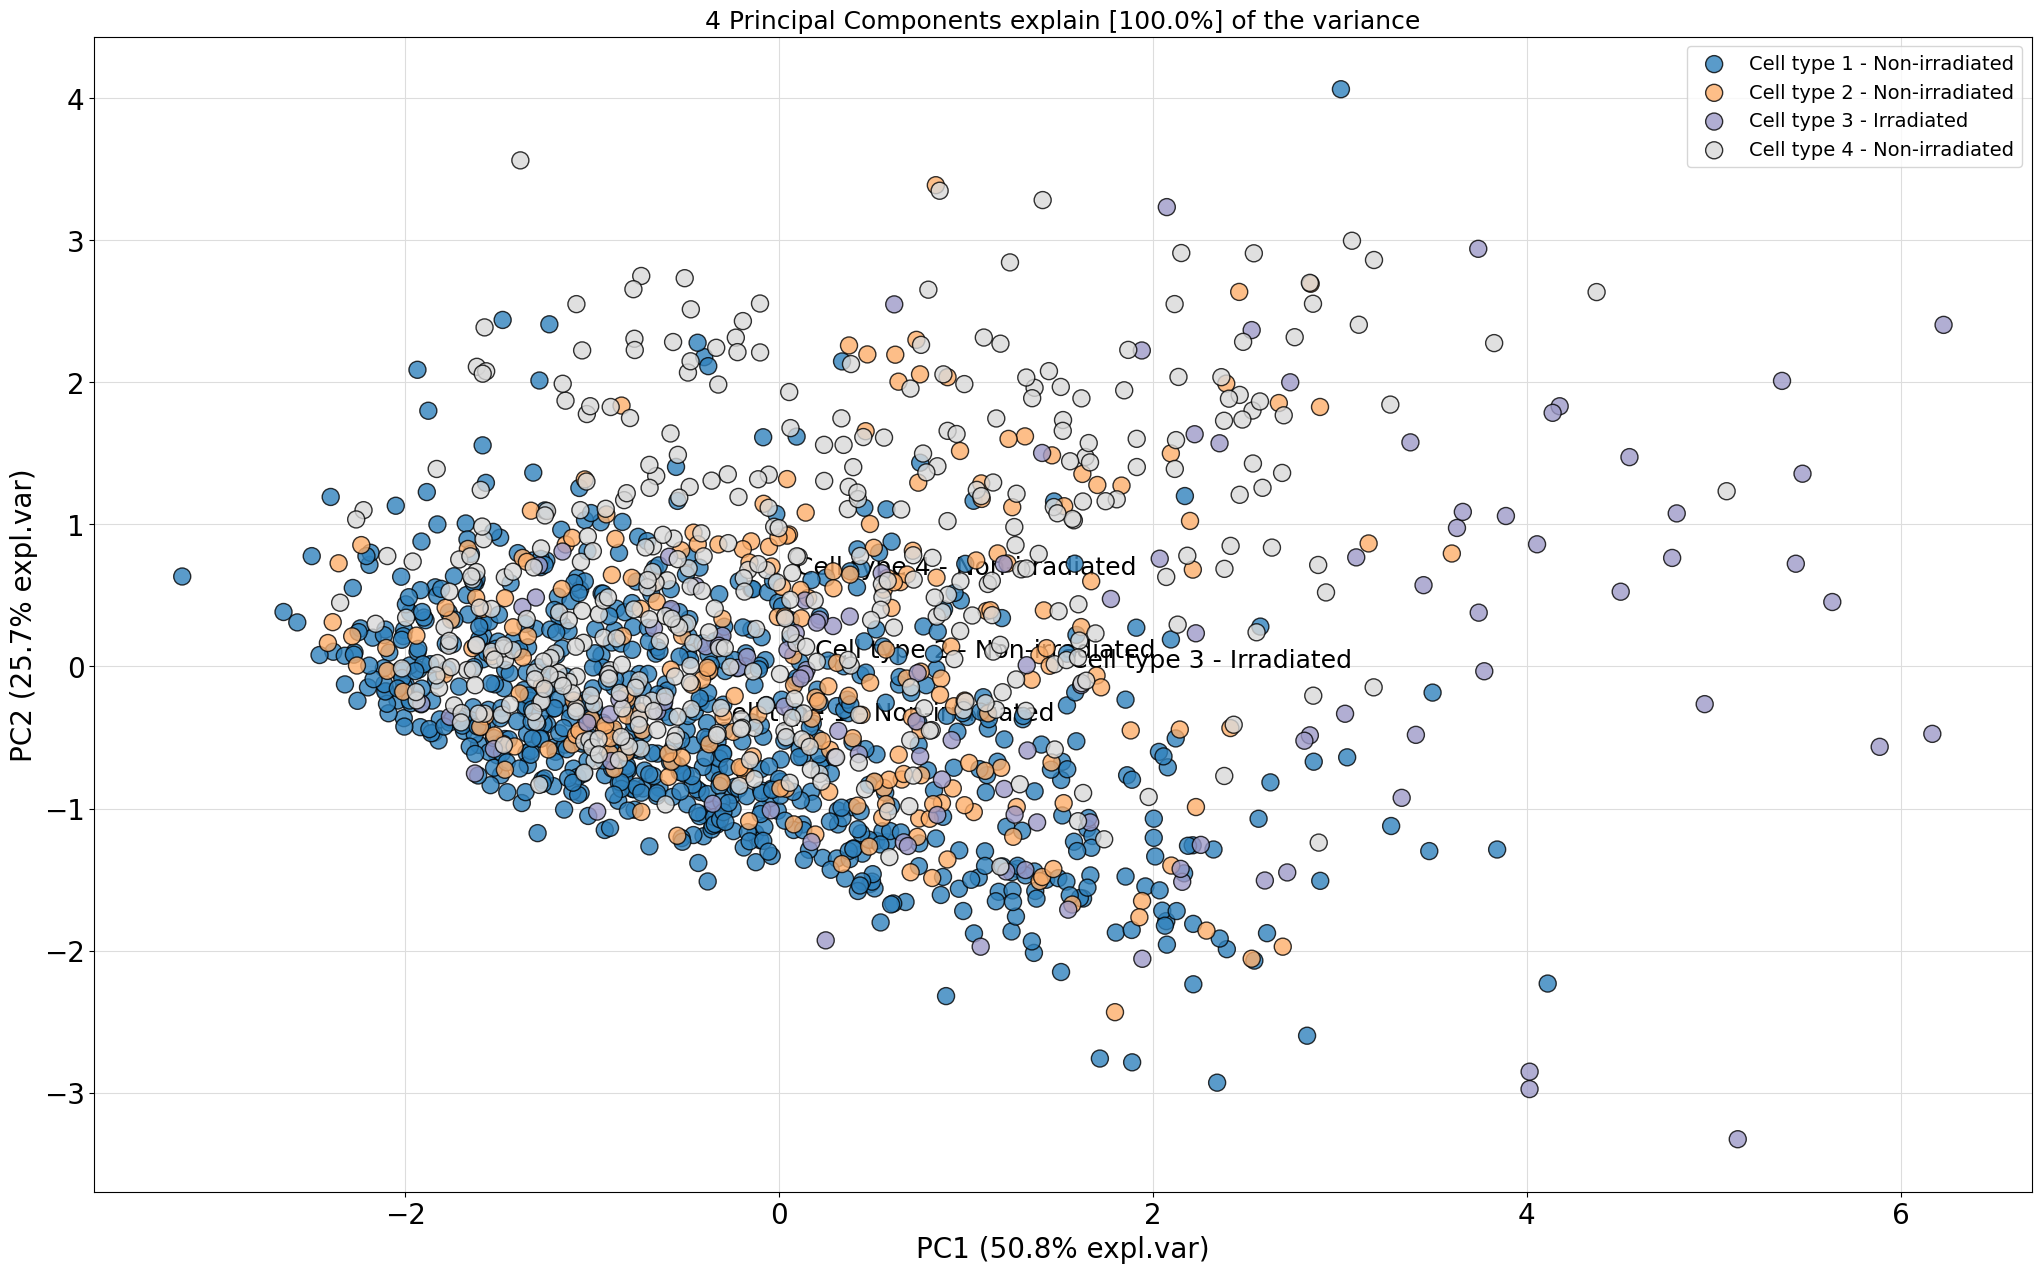

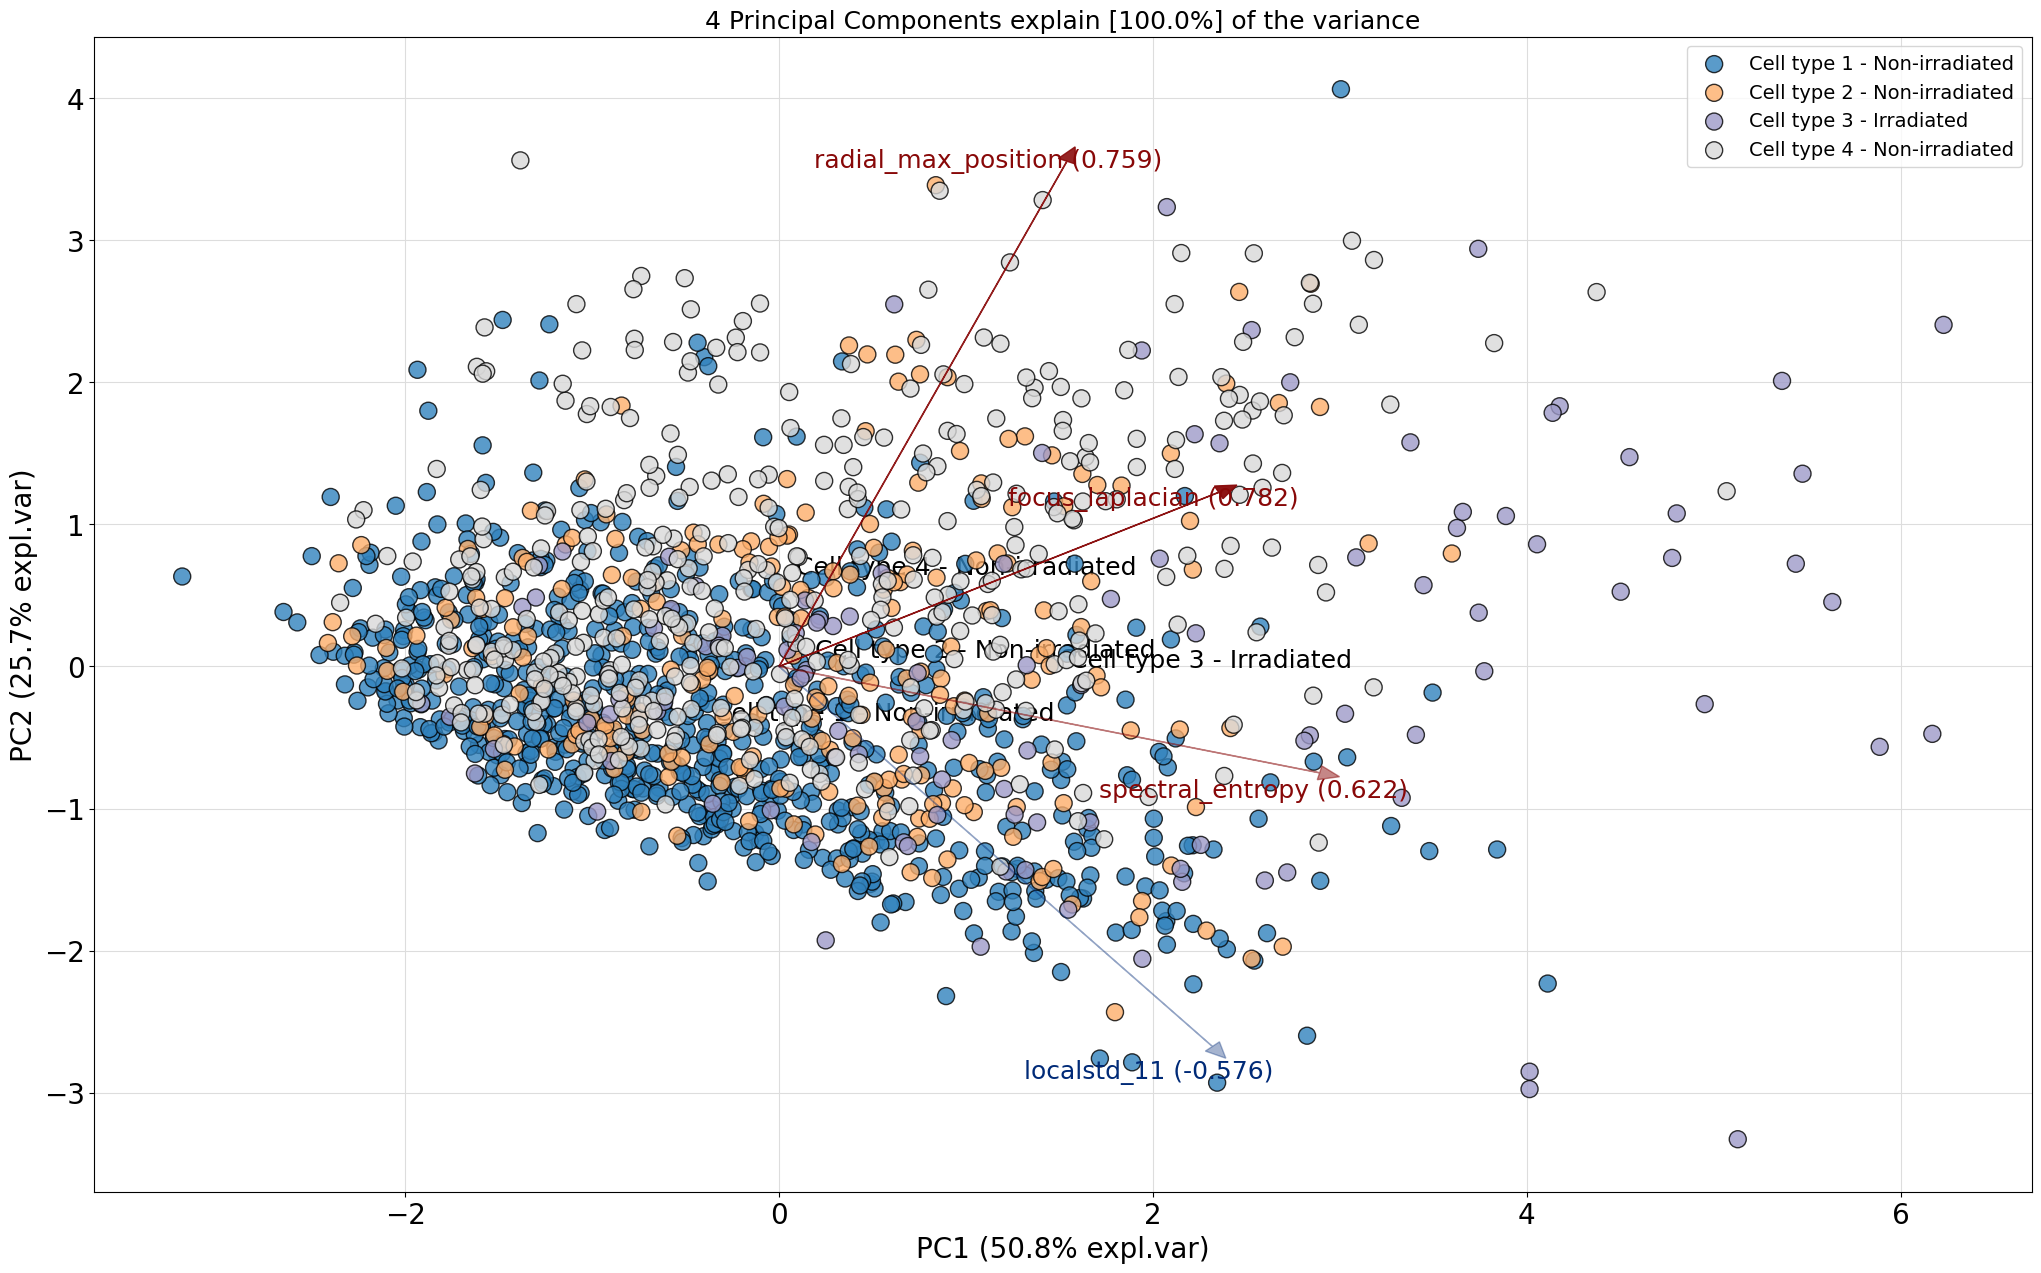

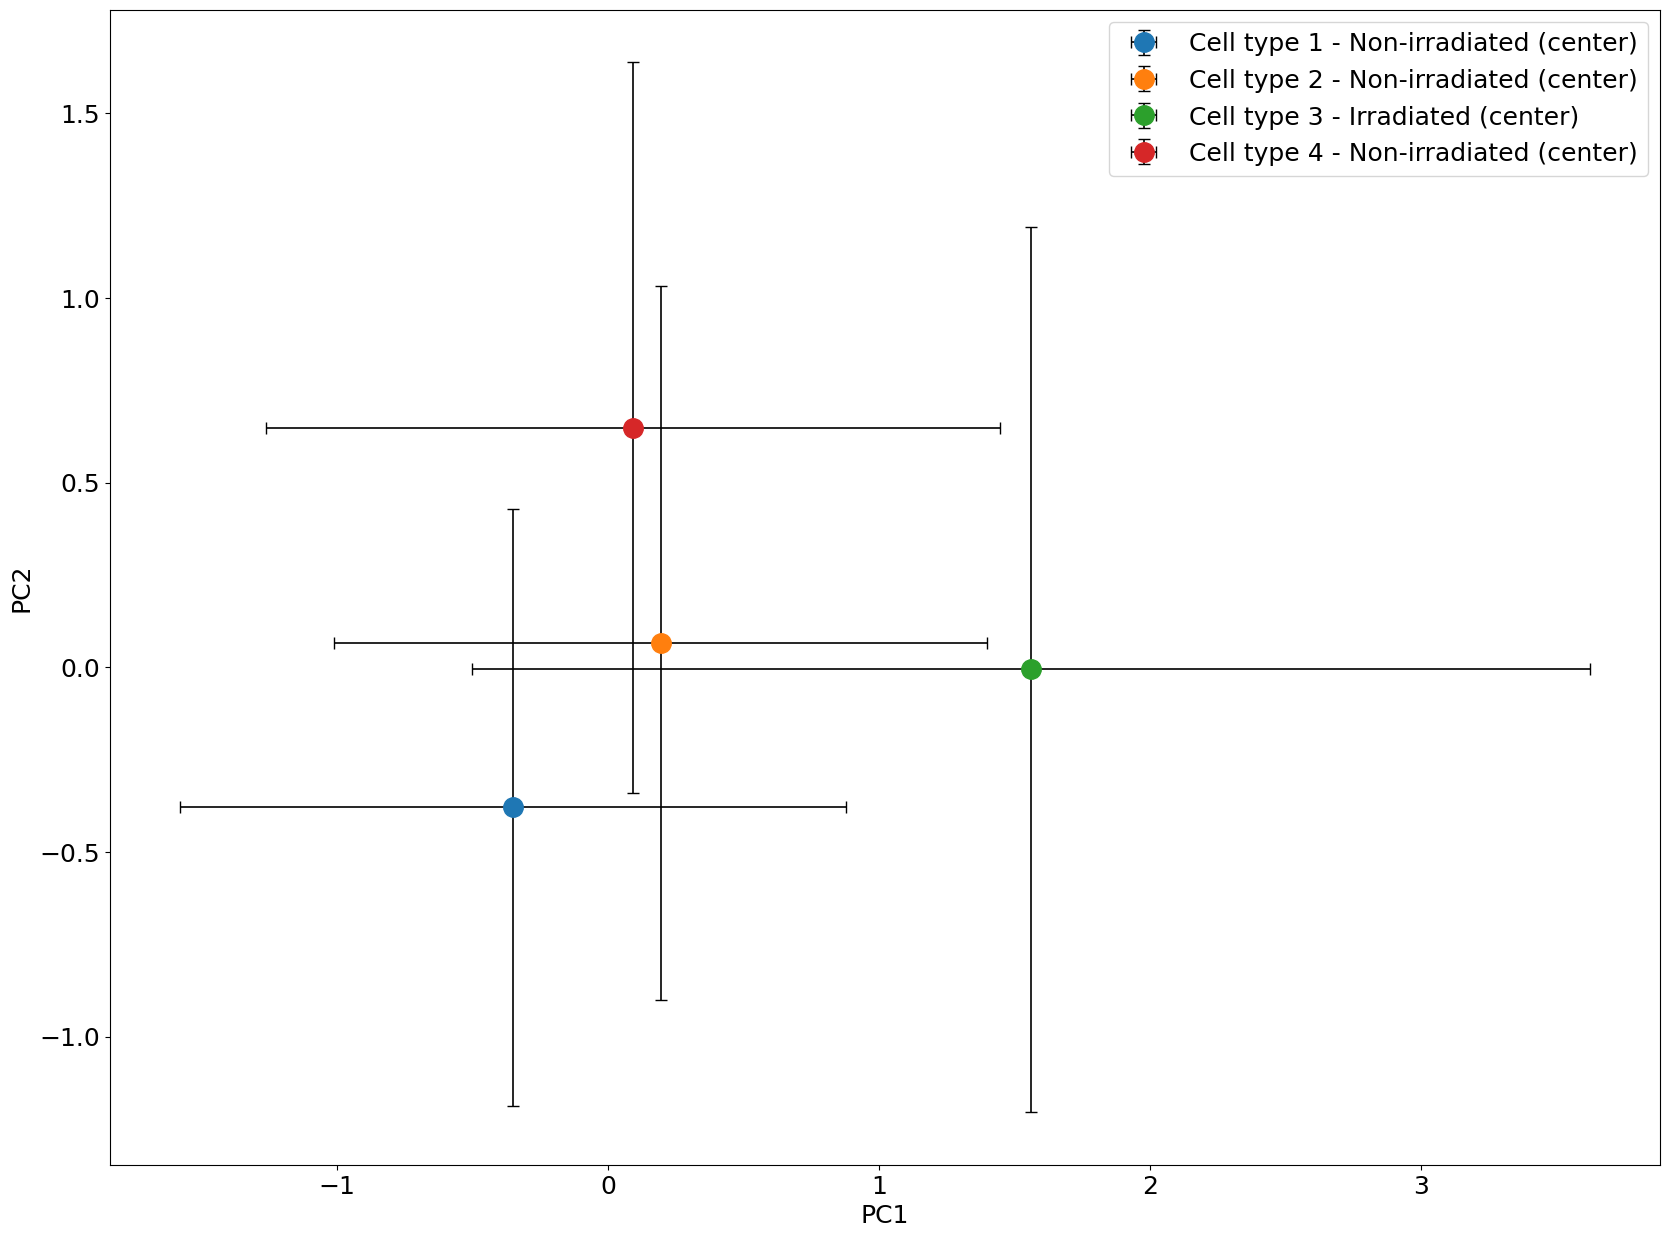

In [111]:
from pca import pca
import matplotlib.pyplot as plt
import seaborn as sns




X = df.iloc[:, :-4]
y = df["group"]


# Fit PCA
model = pca(normalize=True)
results = model.fit_transform(X=X, row_labels=y)


fig, ax = model.plot()


fig, ax = model.scatter()


fig, ax = model.biplot()




scores = results['PC']        # DataFrame with PC1, PC2, ...
scores['group'] = y.values
scores['cell_type'] = df['cell_type'].values
scores['condition'] = df['condition'].values


plt.figure(figsize=(20, 15))
for g, sub in scores.groupby('group'):
    mean_x = sub["PC1"].mean()
    mean_y = sub["PC2"].mean()
    std_x = sub["PC1"].std()
    std_y = sub["PC2"].std()

    plt.errorbar(mean_x, mean_y, xerr=std_x, yerr=std_y,
                 fmt='o', ecolor='black',
                 elinewidth=1.2, capsize=4, markersize=14,
                 label=f"{g} (center)")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

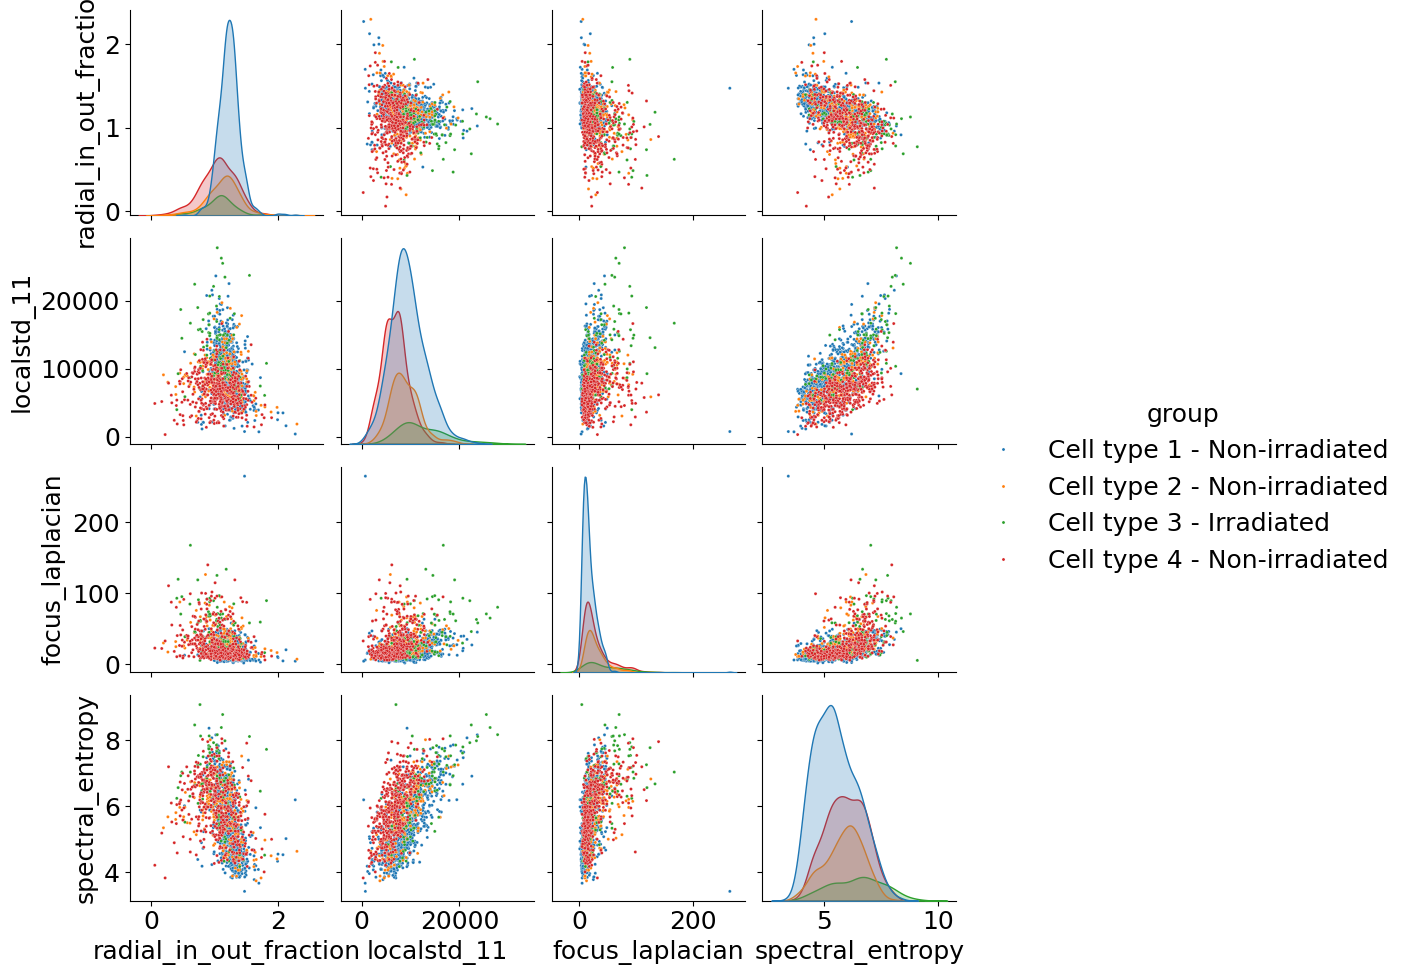

In [107]:
# small markers 
sns.pairplot(df, hue="group", plot_kws={"s": 5, "alpha": 1})
plt.show()